# Information Flows

The [Open Archival Information System (OAIS)](https://en.wikipedia.org/wiki/Open_Archival_Information_System) reference model is generally very high-level. There are a _lot_ of different ways of running an archive that would still fit. 

But one thing it is very clear about is the overall flow of information through the archive. 

## Flow 1: The Line

```{glue:figure} oais_environment_dot
:figwidth: 100%
:name: "oais_environment_dot"
```

> OAIS §1.4 - CONFORMANCE:
> "A conforming OAIS Archive implementation shall support the model of information 
described in 2.2"
>
> OAIS §2.2.3 - INFORMATION PACKAGE VARIANTS:
> "Within the OAIS one or more SIPs are transformed into one or more Archival Information Packages  (AIPs)  for  preservation. [...] In response to a request, the OAIS provides all or a part of an AIP to a Consumer in the form of a Dissemination Information Package (DIP). "

Under OAIS, Submission Information Packages (SIPs) come in from Producers, are managed as Archival Information Packages (AIPs), and these AIPs are then used to generate the Dissemination Information Packages (DIPs) that serve the needs of the archive's user community a.k.a. Consumers. This fundamental design pattern for digital archives -- this way of describing the overall flow of archival information -- can be visualised as follows:

```{glue:figure} flow_line_with_contexts_dot
:figwidth: 100%
:name: "flow_line_with_contexts_dot"
```

Or simply:

```{glue:figure} flow_line_dot
:figwidth: 100%
:name: "flow_line_dot"
```

This linear flow is one of the strengths of the OAIS model, because by generating the DIP from the AIP, we ensure that all the information we might need to (re)create a new DIP is in the archive.

For an implementation to follow this pattern, it must ensure that _only_ information that is in the AIP was used in the creation of the DIP, and there is no dependency on the SIP. OAIS does this by specifying that the DIP is generated from the AIP held on Archival Storage, after the SIP has been discarded. This could be immediately after ingest, or some time later, or on demand -- the important thing is that it's post-ingest. To understand what this means in practice, it is useful to look at some examples of digital archives that work in this way.

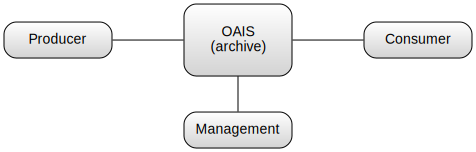

In [17]:
import graphviz
from myst_nb import glue

source = """
graph oais {
    rankdir=BT;
    
    node [color=Black,fontname=Arial,shape="box",style="rounded,filled",fillcolor="lightgrey:white", gradientangle=90,width="1.5",height="0.5"];
    
    man [label="Management"];
    
    nodesep=1;
    sip [label="Producer"];
    aip [label="OAIS\n(archive)", height="1.0"];
    dip [label="Consumer"];
    
    sip -- aip -- dip;
    man -- aip;
    
    {rank=same; aip, dip, sip}
}
"""
dia = graphviz.Source(source, format='svg')
glue("oais_environment_dot", dia)

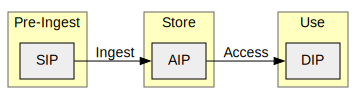

In [18]:
source = """
digraph longtime_ingestdip {
    rankdir=LR;
    newrank=true;
        
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [fontname=Arial];
    
    subgraph cluster_ingest {
        label="Pre-Ingest" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        isip [label="SIP"];
    }
      
    subgraph cluster_store {
        label="Store" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
      saip [label="AIP"]; 
    }
    
    subgraph cluster_access {
        label="Use" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        adip [label="DIP"];
    }
    
    isip -> saip [label="Ingest"];
    saip -> adip [label="Access"];
}
"""
glue("flow_line_with_contexts_dot", graphviz.Source(source, format='svg'))

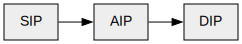

In [19]:
source = """
digraph oais_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    
    sip [label="SIP"];
    dip [label="DIP"];
    aip [label="AIP"];
    sip -> aip -> dip;
}
"""
glue("flow_line_dot", graphviz.Source(source, format='svg'))

### The UK Web Archive

Like most web archives, the [UK Web Archive](https://www.webarchive.org.uk/) generates access copies on demand. Before that can happen, the archived web resources are captured in [WARC](https://en.wikipedia.org/wiki/Web_ARChive) files, which are then placed on archival storage before the necessary indexes are generated from them in order to enable access. When individual items are requested, the relevant records are looked up in the indexes before being copied from the AIP, and the access version (DIP) is generated from the archival version during the playback process.[^1]

```{glue:figure} flow_line_warc_dot
:figwidth: 100%
:name: "flow_line_warc_dot"

```

Because the transformation is done on demand, this makes it easier to modify how playback is performed in response to changes in web technology. In essence, we preserve the software that gives us the ability to generate access copies, rather than preserving the access copies directly.


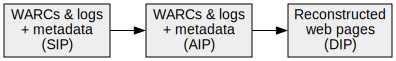

In [20]:
source = """
digraph warc_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    
    sip [label="WARCs & logs\n + metadata\n(SIP)"];
    aip [label="WARCs & logs\n + metadata\n(AIP)"];
    #idx [label="Indexes", shape="ellipse",fillcolor="#fbfbfb"];
    dip [label="Reconstructed\nweb pages\n(DIP)"];
    sip -> aip;
    aip -> dip;# [dir=both];
    #aip -> idx;
    #idx -> dip [dir=both];
    
}
"""
glue("flow_line_warc_dot", graphviz.Source(source, format='svg'))

### The Internet Archive

While their web archive generates derivatives on demand (as above), the [Internet Archive](https://archive.org)'s documentation makes it clear that their archival system generates various derivatives for items after they have been ingested/uploaded, depending on the content. See for example this [documentation on type of derivatives they generate](https://help.archive.org/files-formats-and-derivatives-a-basic-guide/), and this [summary table showing all the format conversions they do](https://archive.org/help/derivatives.php).  The derivatives are stored rather than re-generated on demand, but doing this post-ingest means the derivation process can't block the process of ingesting items and ensuring they are safely replicated.

```{glue:figure} flow_line_ia_dot
:figwidth: 100%
:name: "flow_line_ia_dot"

```

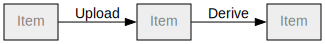

In [21]:
source = """
digraph oais_ia_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [fontname=Arial];
    
    sip [label="Item",fontcolor="gray"];
    dip [label="Item",fontcolor="gray"];
    aip [label="Item",fontcolor="gray"];
    sip -> aip [label="Upload"];
    aip -> dip [label="Derive"];
}
"""
glue("flow_line_ia_dot", graphviz.Source(source, format='svg'))

Note that the Internet Archive documentation does not talk in terms of SIPs AIPs and DIPs.  The information packages are simply referred to as _Items_ throughout, where an _Item_ is essentially a collection of files and (optional) sub-folders.  More emphasis is placed on explaining the _Upload_ and _Derive_ processes, e.g. how different file formats and configurations are interpreted during the generation of derivatives.

## Flow 2: The Stop

The linear workflow described above may seem obvious, perhaps even inevitable, but it's not. Indeed, it's not unusual to find archives where there is _no outflow at all_.  This corresponds to so called "dark archives" - ones that cannot be accessed except by the people who manage the archive. Usually, this is because the content is available elsewhere, and the archive is acting as a 'backup copy' in case the original goes away.

```{glue:figure} flow_stop_dot
:figwidth: 100%
:name: "flow_stop_dot"

```

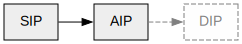

In [22]:
source = """
digraph fork_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    sip [label="SIP"];
    aip [label="AIP"];
    dip [label="DIP", color="gray",fontcolor="gray",fillcolor="#fefefe", style="filled,dashed"]

    sip -> aip;
    aip -> dip [style=dashed, color=grey];
}
"""
glue("flow_stop_dot", graphviz.Source(source, format='svg'))

In these cases, the focus tends to be on ingesting the content, and not on how that content might be used in the future. There may be DIPs, but they are not well tested because no-one really uses them much. Or there may be no DIPs at all, or just some theoretical DIP based on an imagined future. The danger here is that it's possible to miss some information you need from the SIP, or from the wider context, because you'd only realise you needed it when your user community started trying to access the material. Ideally, to mitigate against this risk, it is necessary to either encourage real usage, or at least simulate it, so that access problems can be identified while there is still some hope of resolving them. Otherwise, your AIPs are like a backup that's never been tested.

### The UK Web Archive

While the UK Web Archive has thousands of open-access websites, we also archive many millions of sites that can only be accessed under Non-Print Legal Deposit terms. This places heavy restrictions on access to those sites, and this combined with our limited capacity for manual quality assurance means it is unlikely that many of these archived pages will be viewed quickly enough to pick up any issues while we can still resolve them. One way we are trying to mitigate this risk is by starting to automate some of the manual QA processes. For example, for many years we have been collecting screenshots of how the websites looked when the web crawler originally visited them. The next step will be to add a post-ingest process that takes a screenshot of the _archived_ web page in the same way as the crawler, allowing the images to be directly compared. This should highlight any issues and focus our efforts on where things needs to be improved. We have also been working on publishing non-consumptive datasets based on our holdings. These are no substitute for the original web pages, but the surrogates are rich enough that meaningful research can be done with them, and this can help identify gaps in our collection.

### Electronic Journals

Due to their importance and economic value, eJournals are often 'backed up' in dark archives like CLOCKSS or Portico. Usually, access to eJournals is via the publisher sites, and the archived copies only become active if the publisher shuts down.  Here, AIPs usually contain all the SIP information, but ensuring the completeness of these packages is highly dependent on how fully the structure and content can be validated. This is particularly challenging when it come to the handling of supplementary material, as this can come in a wide range of formats, or may only be supplied as a reference to resources held elsewhere.

## Flow 3: The Fork

The final class of information flow breaks the linear model entirely: while there is always a line from ingest to access[^2], there is sometimes a fork in the road.

```{glue:figure} flow_fork_dot
:figwidth: 100%
:name: "flow_fork_dot"

```

In this kind of split workflow, both the AIP and the DIP are generated directly from the SIP. In contrast to the linear flow, this design pattern _does not automatically ensure_ that the AIP contains all the information we need to generate the DIP. This is not to say that this risk cannot be addressed, rather the point is that the implementation has to do _additional work_ to make sure that this is the case.

One of the reasons why this can happen is that, during the design and implementation of archival workflows, it is common to try and perform a lot of processing up-front. Schematically, the result can look something like this:

```{glue:figure} flow_fork_dip_ingest_dot
:figwidth: 100%
:name: "flow_fork_dip_ingest_dot"

```

Here I am using _Ingest_, _Store_ and _Access_ to identify processing contexts, covering all the functions associated with that phase of the workflow. During the _Ingest_ phase, the incoming packages have been used to generate the DIP before the AIP has been transferred to the archive store.  This means it is _possible_ for the AIP and DIP to diverge.

In many cases, especially those where the critical payload of each package is a single file, this is a modest burden, because when the number of files involved is small, it's easier to keep track of individual files, their checksums, and their relationships. As things get more complex, it becomes easier for errors to creep in, especially if some network or system outage occurs while an item is being processed. These potential risks are certainly manageable - the point is simply that these risks arise because of the decision to perform more processing up front.  This does not mean "The Fork" is a _bad_ pattern, indeed in those cases where we can confidently verify the packages are complete, this means we can pick up problems before items make it to the archival store. The downside is that if there are problems during ingest, this can lead to a backlog of material that spends far too long stuck on non-archival storage.

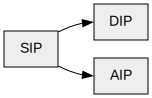

In [23]:
source = """
digraph fork_flow {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    sip [label="SIP"];
    dip [label="DIP"];
    aip [label="AIP"];

    sip -> aip:w;
    sip -> dip:w;
}
"""
glue("flow_fork_dot", graphviz.Source(source, format='svg'))

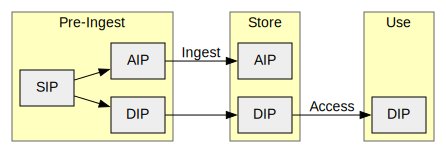

In [24]:
source = """
digraph longtime_ingestdip {
    rankdir=LR;
    newrank=true;
        
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [fontname=Arial];
    
    subgraph cluster_ingest {
        label="Pre-Ingest" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        isip [label="SIP"];
        iaip [label="AIP"];
        idip [label="DIP"];
    }
      
    subgraph cluster_store {
        label="Store" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
      sdip [label="DIP"];
      saip [label="AIP"]; 
    }
    
    subgraph cluster_access {
        label="Use" fontname=Arial fillcolor="#ffffbf" style=filled color="#666666";
        aaip [label="DIP",style=invis];
        adip [label="DIP"];
    }
    
    isip -> idip -> sdip;
    sdip -> adip [label="Access"];
    isip -> iaip;
    iaip -> saip [label="Ingest"];
    saip -> aaip [style=invis];
      
}
"""
glue("flow_fork_dip_ingest_dot", graphviz.Source(source, format='svg'))

### An Outsourced Digitization

```{glue:figure} flow_fork_upstream_dot
:figwidth: 100%
:name: "flow_fork_upstream_dot"

```

This example involves a digitization project where much of the work had been outsourced to a third-party. The decision had been made to get the external partner to generate "access copies" as well as the long-term "preservation copies". The preservation version consisted of high-resolution, full page TIFF files and associated metadata tying each set of TIFFs together, mapping back to the original publication. However, the access versions were not simply JPEGs of the preservation versions, because the items were broken up at the level of individual articles. This worked well for access purposes at the time.

The problem was the article segmentation process had not been properly documented. The coordinates on the TIFF version that corresponded to the positions of the JPEG versions had been lost. This meant that when the access system became obsolete, it was not be possible to replace it like-for-like, i.e. while still preserving the same article-level experience. 

### Preservation System Design

When looking at tools and services that implemented digital preservation processes, it can be very difficult to tell exactly what's going on _under the hood_ and therefore difficult to determine what kind of information flow is being implemented. However, both [Archivematica](https://www.archivematica.org/en/) and [Rosetta](https://exlibrisgroup.com/products/rosetta-digital-asset-management-and-preservation/) have a significant amount of documentation that is openly accessible online, so this allows is to gain some insight into how things are done.

Reading [the Archivematica documentation](https://www.archivematica.org/en/docs/archivematica-1.13/user-manual/ingest/ingest/#normalize) it is clear that Archivematica _usually_ performs all processing up front, prior to ingest: the DIP is clearly generated directly from the SIP, but the system takes steps to ensure nothing is lost by making the original SIP form the basis of the AIP. Archivematica does make it possible to derive access copies in a post-ingest process as part of the 're-ingest' workflow, but this is not the normal mode of operation. Rosetta also supports post-ingest generation of access copies via a [_Create Derivative Copy Representation_](https://knowledge.exlibrisgroup.com/Rosetta/Knowledge_Articles/How_does_Rosetta_manage_Derivative_Copy_representations%3F) workflow, but like Archivematica, this appears to be seen as a secondary mode of operation, with ingest-time processing being the primary focus.

```{glue:figure} flow_fork_encapsulated_dot
:figwidth: 100%
:name: "flow_fork_encapsulated_dot"

```

Note that this is not a criticism of these tools, which are merely implementing the workflow that their users have requested. Note also that it is not possible to draw comparisons with other preservation systems because this analysis is necessarily skewed towards those tools that provide detailed documentation online.

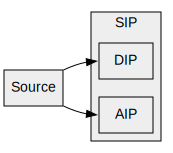

In [25]:
source = """
digraph upstream_fork_flow {
    rankdir=LR;
    compound=true;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];

    source [label="Source"]


    subgraph cluster1 {
      label="SIP";
      color=Black;
      fontname=Arial;
      shape=box;
      style=filled;
      fillcolor="#eeeeee";
      dip [label="DIP"];
      aip [label="AIP"];
    }

    source -> dip:w;
    source -> aip:w;
}
"""
glue("flow_fork_upstream_dot", graphviz.Source(source, format='svg'))

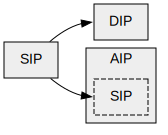

In [26]:
source = """
digraph encapsulated_fork_flow {
    rankdir=LR;
    compound=true;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];

    sip [label="SIP"]

    dip [label="DIP"];

    subgraph cluster1 {
      label="AIP";
      color=Black;
      fontname=Arial;
      shape=box;
      style=filled;
      fillcolor="#eeeeee";
      sips [label="SIP",style="dashed"];
    }

    sip -> dip:w;
    sip -> sips:w;
}
"""
glue("flow_fork_encapsulated_dot", graphviz.Source(source, format='svg'))

## Summary

These three distinct information flow patterns show that there are fully-functional and widespread archival information flows that are not strictly OAIS conformant. This is not a problem with the archives or the software, but just alternative modes of operation that are not fully represented by OAIS as it stands. Each information flow pattern has it's place, but it's important to be aware of the balance of benefits and risks of each.

It's also important to consider where the archive fits into the wider information environment, because these patterns may turn up in combination.

### Backup versus Archive

For example, in some cases, the digital preservation system may be run as a 'sidecar' service, alongside a live 'Work In Progress' (WIP) system that is used for managing digital resources and making them available to end users.  There may be an existing repository, or some content/asset management system, which works well day-to-day but does not meet all the requirements of preservation requirements. For example, it may not be capable of managing the process of data replication, or handling formats preferred for preservation purposes.

To address these gaps, a 'sidecar' preservation service takes copies of items from the 'Work In Progress' system, leading to an overall information flow that looks like this:

```{glue:figure} flow_sidecar_dot
:figwidth: 100%
:name: "flow_sidecar_dot"

```

This final picture combines both the Fork and the Stop patterns of information flow, and so style of implementation needs to address both the risks of gaps between the AIP and the _real_ DIP that users actually use, and other, greater inconsistencies between the AIP and DIP, like whether there really is a preserved AIP for every DIP. Indeed, because the overall organisational archival function is being delivered by multiple separate systems (which may even be operated by different teams), the risk of missed dependencies and inconsistencies is greater still.  It can also mean that the preservation service receives very little information about how end users are interacting with the content, preventing the service from engaging with the user community and detecting access difficulties and issues relating to obsolescence.

[^1]: Note that while this overall information flow of does match OAIS quite well, there are significant areas of divergence. For example, the composition of the different information packages does not quite line up with the OAIS definitions. The different ways of implementing information packages is another aspect of digital preservation that might benefit from the identification of different patterns of practice.

[^2]: Unless you have a time machine. But in that case, you don't need to worry about digital preservation.

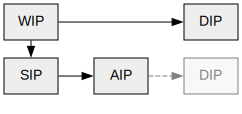

In [27]:
source = """
digraph upstream_fork {
    rankdir=LR;
    
    node [color=Black,fontname=Arial,shape=box,style=filled,fillcolor="#eeeeee"];
    edge [];
    
    subgraph cluster1 {
      up [label="WIP"];
      dip [label="DIP"];
      up->dip;
    }
    
    subgraph cluster2 {
      sip [label="SIP"];
      aip [label="AIP"];
      adip [label="DIP", color=grey, fontcolor=gray, fillcolor="#f8f8f8"];
      color=invis;

      sip -> aip;
      aip -> adip [color=Grey, style=dashed];
    }

    up->sip [constraint=false];
    
    {rank=same; up sip}
    {rank=same; dip adip}
}
"""
glue("flow_sidecar_dot", graphviz.Source(source, format='svg'))